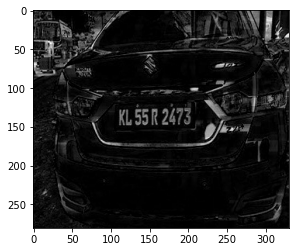

In [16]:
from skimage.segmentation import clear_border
import numpy as np
import imutils
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('pic10.jpg')


image = cv2.resize(image, (0, 0), fx=0.7, fy=1)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
rectKern = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))
blackhat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, rectKern)

plt.imshow(blackhat,cmap='gray')
plt.show()

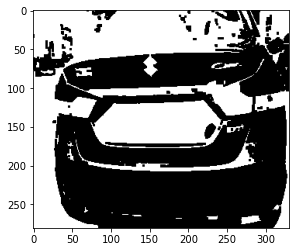

In [17]:
squareKern = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
light = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, squareKern)
light = cv2.threshold(light, 0, 255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

plt.imshow(light,cmap='gray')
plt.show()

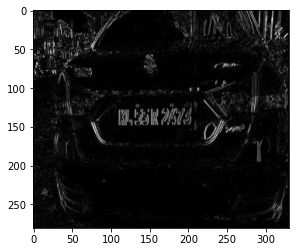

In [18]:
gradX = cv2.Sobel(blackhat, ddepth=cv2.CV_32F,dx=1, dy=0, ksize=-1)
gradX = np.absolute(gradX)
(minVal, maxVal) = (np.min(gradX), np.max(gradX))
gradX = 255 * ((gradX - minVal) / (maxVal - minVal))
gradX = gradX.astype("uint8")

plt.imshow(gradX,cmap='gray')
plt.show()

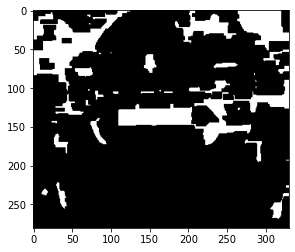

In [19]:
gradX = cv2.GaussianBlur(gradX, (5, 5), 0)
gradX = cv2.morphologyEx(gradX, cv2.MORPH_CLOSE, rectKern)
thresh = cv2.threshold(gradX, 0, 255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

plt.imshow(thresh,cmap='gray')
plt.show()

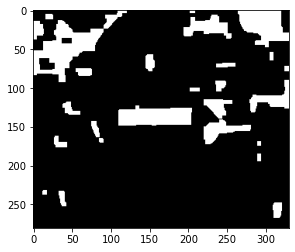

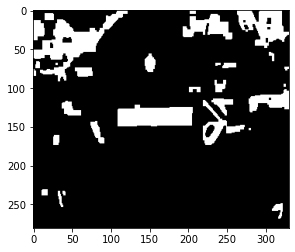

In [20]:
thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=2)

plt.imshow(thresh,cmap='gray')
plt.show()

thresh = cv2.bitwise_and(thresh, thresh, mask=light)
thresh = cv2.dilate(thresh, None, iterations=2)
thresh = cv2.erode(thresh, None, iterations=1)

plt.imshow(thresh,cmap='gray')
plt.show()

1.326086956521739
3.4642857142857144


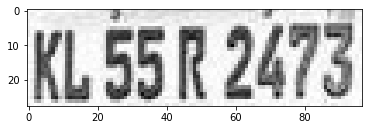

In [21]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:5]
candidates = cnts

for c in candidates:
  
  (x, y, w, h) = cv2.boundingRect(c)
  ar = w / float(h)
  print(ar)
 
  if ar >= 3 and ar <= 5:    
    
    licensePlate = gray[y:y + h, x:x + w]

    plt.imshow(licensePlate, cmap= 'gray')
    plt.show()
  
   
    break
	

In [22]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files/Tesseract-OCR/tesseract.exe'
Cropped=licensePlate.copy()
text = pytesseract.image_to_string(Cropped, config='--psm 11')
print("Detected license plate Number is:",text)


Detected license plate Number is: KL 552 2473

